In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
panstr = pd.read_csv('canis_panstar.csv')

In [4]:
panstr.columns

Index(['objName', 'objID', 'raMean', 'decMean', 'raMeanErr', 'decMeanErr',
       'nDetections', 'randomID', 'projectionID', 'skyCellID', 'objInfoFlag',
       'qualityFlag', 'raStack', 'decStack', 'raStackErr', 'decStackErr',
       'epochMean', 'nStackDetections', 'ng', 'nr', 'ni', 'nz', 'ny',
       'gQfPerfect', 'gMeanPSFMag', 'gMeanPSFMagErr', 'gMeanKronMag',
       'gMeanKronMagErr', 'gMeanApMag', 'gMeanApMagErr', 'gFlags',
       'rQfPerfect', 'rMeanPSFMag', 'rMeanPSFMagErr', 'rMeanKronMag',
       'rMeanKronMagErr', 'rMeanApMag', 'rMeanApMagErr', 'rFlags',
       'iQfPerfect', 'iMeanPSFMag', 'iMeanPSFMagErr', 'iMeanKronMag',
       'iMeanKronMagErr', 'iMeanApMag', 'iMeanApMagErr', 'iFlags',
       'zQfPerfect', 'zMeanPSFMag', 'zMeanPSFMagErr', 'zMeanKronMag',
       'zMeanKronMagErr', 'zMeanApMag', 'zMeanApMagErr', 'zFlags',
       'yQfPerfect', 'yMeanPSFMag', 'yMeanPSFMagErr', 'yMeanKronMag',
       'yMeanKronMagErr', 'yMeanApMag', 'yMeanApMagErr', 'yFlags', 'Ang'],
      dtyp

In [5]:
#panstr[['gMeanPSFMag','rMeanPSFMag','iMeanApMag']]
mags = pd.read_csv('ALL-2MASS-matched.csv')

In [6]:
mags.head(2)

,ID,Vmag,Vmag_ERR,UmB,UmB_ERR,BmV,BmV_ERR,VmR,VmR_ERR,VmI,...,cc_flg,gal_contam,mp_flg,pts_key,j_m_stdap,j_msig_stdap,h_m_stdap,h_msig_stdap,k_m_stdap,k_msig_stdap
0,1467,16.2973,0.0241,0.7610,0.0439,1.1621,0.0289,0.7236,0.0289,1.3530,...,0,0,0,238334197,14.068,0.038,13.613,0.036,13.339,0.083
1,1018,15.8624,0.0253,99.9999,99.9999,1.2095,0.0291,0.7678,0.0292,1.4067,...,0,0,0,238375451,13.464,0.037,12.844,0.039,12.824,0.033


In [7]:
mags.loc[mags['ID'] == 2433]['j_cmsig']

347    0.071
Name: j_cmsig, dtype: float64

In [8]:
mags.columns

Index(['ID', 'Vmag', 'Vmag_ERR', 'UmB', 'UmB_ERR', 'BmV', 'BmV_ERR', 'VmR',
       'VmR_ERR', 'VmI', 'VmI_ERR', 'RA', 'DEC', 'GLON', 'GLAT', 'VHEL',
       'VHEL_ERR', 'TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'ABUN', 'ABUN_ERR',
       'designation', 'j_m', 'j_cmsig', 'j_msigcom', 'j_snr', 'h_m', 'h_cmsig',
       'h_msigcom', 'h_snr', 'k_m', 'k_cmsig', 'k_msigcom', 'k_snr', 'ph_qual',
       'rd_flg', 'bl_flg', 'cc_flg', 'gal_contam', 'mp_flg', 'pts_key',
       'j_m_stdap', 'j_msig_stdap', 'h_m_stdap', 'h_msig_stdap', 'k_m_stdap',
       'k_msig_stdap'],
      dtype='object')

In [9]:
tovosa = panstr[['gMeanPSFMag','rMeanPSFMag','iMeanApMag','zMeanApMag','yMeanApMag','gMeanApMagErr','rMeanApMagErr','iMeanApMagErr','zMeanApMagErr','yMeanApMagErr',]]

In [11]:
pd.options.mode.chained_assignment = None 
tovosa[0] = mags['ID']
tovosa[1] = mags['j_m']
tovosa[2] = mags['h_m']
tovosa[3] = mags['k_m']
tovosa[4] = mags['j_cmsig']
tovosa[5] = mags['h_cmsig']
tovosa[6] = mags['k_cmsig']

In [12]:
tovosa = tovosa[[  0, 'gMeanPSFMag',   'rMeanPSFMag',    'iMeanApMag',    'zMeanApMag',
          'yMeanApMag', 1, 2, 3,'gMeanApMagErr', 'rMeanApMagErr', 'iMeanApMagErr',
       'zMeanApMagErr', 'yMeanApMagErr',             4,               5,
                     6]  ]

In [13]:
tovosa.head(2)

,0,gMeanPSFMag,rMeanPSFMag,iMeanApMag,zMeanApMag,yMeanApMag,1,2,3,gMeanApMagErr,rMeanApMagErr,iMeanApMagErr,zMeanApMagErr,yMeanApMagErr,4,5,6
0,1467,16.584,15.846,15.482,15.328,15.204,14.099,13.615,13.410,0.005,0.004,0.005,0.002,0.005,0.029,0.028,0.040
1,1018,16.169,15.349,14.936,14.739,14.599,13.469,12.854,12.763,0.003,0.003,0.002,0.003,0.002,0.021,0.020,0.023


In [14]:
tovosa.columns = [  0, 'gMeanPSFMag',   'rMeanPSFMag',    'iMeanApMag',    'zMeanApMag',
          'yMeanApMag', 'j', 'h', 'k','gMeanApMagErr', 'rMeanApMagErr', 'iMeanApMagErr',
       'zMeanApMagErr', 'yMeanApMagErr',             'erj',               'erh',
                     'erk']  

In [15]:
filters=('PAN-STARRS/PS1.g','PAN-STARRS/PS1.r','PAN-STARRS/PS1.i','PAN-STARRS/PS1.z','PAN-STARRS/PS1.y','2MASS/2MASS.J'\
        , '2MASS/2MASS.H', '2MASS/2MASS.Ks')

In [16]:
dats=[]
for index, row in tovosa.iterrows():
    for j in range(len(filters)):
        if row[j+1] > 0. and row[j+9] > 0.:
            dats.append((row[0],'...','...','...','...',filters[j],row[j+1],row[j+9],'...','...'))
        
np.savetxt('vosa_canis_ps1jhk_obs.dat',dats,fmt='%s')

In [17]:
vosa = np.genfromtxt('15155.vosa.dat',str)
kk =[[i[0],i[5],i[6],i[7]] for i in vosa]

In [18]:
dat1=[]
for i in range(0,len(kk),5):
    pp=kk[i].copy()
    for j in range(1,5,1):
        pp.append(kk[i+j][2])
        pp.append(kk[i+j][3])
    pp.remove('PAN-STARRS/PS1.g')
    dat1.append(pp)

In [19]:
cf = pd.read_csv('canis_fluxes.dat',sep =' ',header=None)
of = pd.read_csv('obs_flux_ps',sep=' ',header=None)

In [20]:
of.merge(cf,left_on=[0],right_on=[0])

,0,1_x,2_x,3_x,1_y,2_y,3_y
0,1007,PAN-STARRS/PS1.g,2.104687e-15,5.815464e-18,Generic/Johnson.U,3.129100e-16,1.193666e-17
1,1007,PAN-STARRS/PS1.g,2.104687e-15,5.815464e-18,Generic/Johnson.B,1.303295e-15,1.746830e-17
2,1007,PAN-STARRS/PS1.g,2.104687e-15,5.815464e-18,Generic/Johnson.V,2.023668e-15,4.696945e-17
3,1007,PAN-STARRS/PS1.g,2.104687e-15,5.815464e-18,Generic/Johnson.R,1.960432e-15,2.627602e-17
4,1007,PAN-STARRS/PS1.g,2.104687e-15,5.815464e-18,Generic/Johnson.I,1.741228e-15,1.683917e-17
5,1007,PAN-STARRS/PS1.g,2.104687e-15,5.815464e-18,2MASS/2MASS.J,1.181968e-15,1.415222e-17
6,1007,PAN-STARRS/PS1.g,2.104687e-15,5.815464e-18,2MASS/2MASS.H,7.315262e-16,3.234051e-17
7,1007,PAN-STARRS/PS1.g,2.104687e-15,5.815464e-18,2MASS/2MASS.Ks,2.895663e-16,1.173482e-17
8,1007,PAN-STARRS/PS1.r,2.414307e-15,1.903452e-18,Generic/Johnson.U,3.129100e-16,1.193666e-17
9,1007,PAN-STARRS/PS1.r,2.414307e-15,1.903452e-18,Generic/Johnson.B,1.303295e-15,1.746830e-17


In [20]:
vosa = np.genfromtxt('15153.vosa.dat',str)

kk =[[i[0],i[5],i[6]] for i in vosa]

#kk

dat2=[]
for i in range(0,len(kk),5):
    pp=kk[i].copy()
    for j in range(1,5,1):
        pp.append(kk[i+j][2])
    pp.remove('PAN-STARRS/PS1.g')
    dat2.append(pp)

In [21]:
obs=pd.read_csv('obs_flux_ps',sep=' ',header=None,index_col=False,comment='#')
gb=obs.groupby(obs[0],sort=False)
ids=obs[0].unique()
obsg=[]
for i in ids:
    obsg.append([i]+list(gb.get_group(i)[2])+list(gb.get_group(i)[3]))
    #obsg.append(", ".join( repr(e) for e in k ))
#obsg=np.array(obsg)
model_flux=pd.read_csv('grizyjhk_model_fluxes',header=None)
modl=pd.read_csv('ulys_bestfitmodels_ps1.dat',header=None,sep=' ')
modl['mod']=modl[0].map(lambda x: x.lstrip('vnSt').rstrip('.dft')).astype(int)
modl=modl.as_matrix()
pp=[]
for i in range(len(modl)):
    for j in range(len(obsg)):
        #print(modl[i][2],obsg[j][0]) 
        if modl[i][2] == obsg[j][0]:
            #obsg[j]=obsg[j]+[modl[i][1]]
            pp.append((obsg[j]+[modl[i][1]]))

#mods=[i for i in obsg if type(i[-1] )== str ]
mods=[i for i in pp if type(i[-1] )== str ]
model_flux=model_flux.as_matrix()
#obsg=np.array(obsg,dtype=object)
obsg=np.array(pp,dtype=object)

In [22]:
obsg[0]

[447.0,
 3.5025748460690004e-15,
 4.6258601051505002e-15,
 4.4927292364244005e-15,
 3.9412095301190999e-15,
 3.6646075201374005e-15,
 2.7152233710773002e-15,
 1.6467584850815e-15,
 7.3138841070618003e-16,
 6.4519813021234007e-18,
 8.5211492163162998e-18,
 2.4827739279957999e-17,
 7.2599762499345996e-18,
 6.7504565180337009e-18,
 5.7518702297203011e-17,
 3.033441231608e-17,
 1.6167206896134e-17,
 'ckp0_5000_g25']

In [23]:
from scipy.optimize import differential_evolution

In [24]:
int(mods[i][-1][11:13])

10

In [25]:
import seaborn as sns
%matplotlib inline

114
ckm5_5250_g25
301
ckm5_4750_g25
426
ckm5_5000_g30
                 0           1
count   225.000000  225.000000
mean   1669.288889    0.279336
std     761.522260    0.117223
min     447.000000    0.010029
25%    1037.000000    0.211490
50%    1674.000000    0.266303
75%    2194.000000    0.318332
max    4200.000000    0.899995


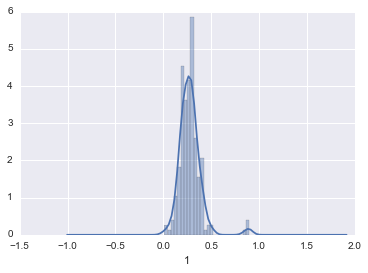

In [35]:
ebv=[]
for i in range(len(mods)):
    for j in range(len(model_flux)):
        if mods[i][-1] == model_flux[j][0]:
            #print (mods[i][-1][-2:])
            if int(mods[i][-1][-2:]) <= 32:
                if len(mods[i]) == 16:
                    print(i)
                    print (model_flux[j][0])
                    def f(x):
                        c1=(mods[i][1] - (x[0]* model_flux[j][2] *10**(-.4 * 3.1*1.31 * x[1] )))**2/(mods[i][8])**2
                        c2=(mods[i][2] - (x[0]* model_flux[j][3] *10**(-.4 * 3.1*1.01 * x[1] )))**2/(mods[i][9])**2
                        c3=(mods[i][3] - (x[0]* model_flux[j][4] *10**(-.4 * 3.1*0.75 * x[1] )))**2/(mods[i][10])**2
                        c4=(mods[i][4] - (x[0]* model_flux[j][5] *10**(-.4 * 3.1*0.48 * x[1] )))**2/(mods[i][11])**2
                        c5=(mods[i][5] - (x[0]* model_flux[j][6] *10**(-.4 * 3.1*0.28 * x[1] )))**2/(mods[i][12])**2
                        c6=(mods[i][6] - (x[0]* model_flux[j][7] *10**(-.4 * 3.1*0.17 * x[1] )))**2/(mods[i][13])**2
                        c7=(mods[i][7] - (x[0]* model_flux[j][8] *10**(-.4 * 3.1*0.11 * x[1] )))**2/(mods[i][14])**2

                        return (c1+c2+c3+c4+c5+c6+c7)/4

                    #ff=differential_evolution(f,bounds=[(0.,1e-20),(0.0,0.9)])
                    #ff=fmin_slsqp(f,[1e-21,0.],bounds=[(0.,None),(0.,None)])
                    #print (i,ff.x[1])
                    #if ff.x[1] > 0.01:
                        #ebv.append((mods[i][0],ff.x[1]))

                if len(mods[i]) == 18:
                    #print (model_flux[j][0])
                    def f(x):
                        c1=(mods[i][1] - (x[0]* model_flux[j][1] *10**(-.4 * 3.172 * x[1] )))**2/(mods[i][9])**2
                        c2=(mods[i][2] - (x[0]* model_flux[j][2] *10**(-.4 * 2.271 * x[1] )))**2/(mods[i][10])**2
                        c3=(mods[i][3] - (x[0]* model_flux[j][3] *10**(-.4 * 1.682 * x[1] )))**2/(mods[i][11])**2
                        c4=(mods[i][4] - (x[0]* model_flux[j][4] *10**(-.4 * 1.322 * x[1] )))**2/(mods[i][12])**2
                        c5=(mods[i][5] - (x[0]* model_flux[j][5] *10**(-.4 * 1.087 * x[1] )))**2/(mods[i][13])**2
                        c6=(mods[i][6] - (x[0]* model_flux[j][6] *10**(-.4 * 0.709 * x[1] )))**2/(mods[i][14])**2
                        c7=(mods[i][7] - (x[0]* model_flux[j][7] *10**(-.4 * 0.449 * x[1] )))**2/(mods[i][15])**2
                        c8=(mods[i][8] - (x[0]* model_flux[j][8] *10**(-.4 * 0.302 * x[1] )))**2/(mods[i][16])**2

                        return (c1+c2+c3+c4+c5+c6+c7+c8)/5

                    ff=differential_evolution(f,bounds=[(0.,1e-20),(0.0,0.9)])
                    #ff=fmin_slsqp(f,[1e-21,0.],bounds=[(0.,None),(0.,None)])
                    #print (len(mods)-i)
                    if ff.x[1] > 0.01 and ff.x[1] :
                        ebv.append((mods[i][0],ff.x[1]))

ebv3=pd.DataFrame(ebv)
print (ebv3.describe())
sns.distplot(ebv3[1],kde=True)

In [60]:
#.distplot(ebv3[1],kde=False)

In [46]:
ebv3.head(2)

,0,1
0,447,0.281638
1,480,0.309638


In [47]:
ebv_old = pd.read_csv('ebvs_m3_35l.dat',header=None)

In [48]:
ebv3 = ebv3.merge(ebv_old,left_on=[0],right_on=[0])

[]

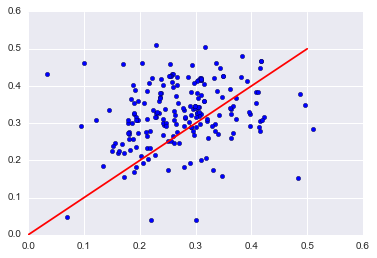

In [49]:
sns.plt.scatter(ebv3['1_x'],ebv3['1_y'])
sns.plt.xlim(0,0.6)
sns.plt.ylim(0,0.6)
xs = np.arange(0,0.6,0.1)
ys = np.arange(0,0.6,0.1)
sns.plt.plot(xs,ys,c='r')
sns.plt.plot()

In [50]:
import scipy.stats

In [51]:
scipy.stats.pearsonr(ebv3['1_x'],ebv3['1_y'])

(0.097545561828524377, 0.16939976657673456)

In [53]:
ebv3.head(2)

,0,1_x,1_y
0,447,0.281638,0.313085
1,480,0.309638,0.324080


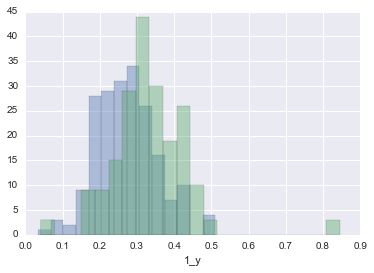

In [54]:
sns.distplot(ebv3['1_x'],kde=False)
sns.distplot(ebv3['1_y'],kde=False)

In [55]:
eb_shafly = pd.read_csv('ebvs_m3_schafly.dat')

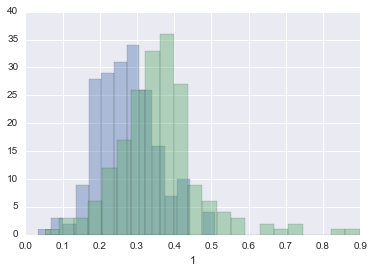

In [58]:
sns.distplot(ebv3['1_x'],kde=False)
sns.distplot(eb_shafly['1'],kde=False)
#sns.distplot(ebv3['1_y'],kde=False)